In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.datasets import load_iris

# Splitting data by asking questions / Decision Trees
Gini impurity
Max-depth
No weights

In [2]:
data_iris = load_iris()
features = pd.DataFrame( data_iris.data, columns = data_iris.feature_names )
target = data_iris.target

features.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


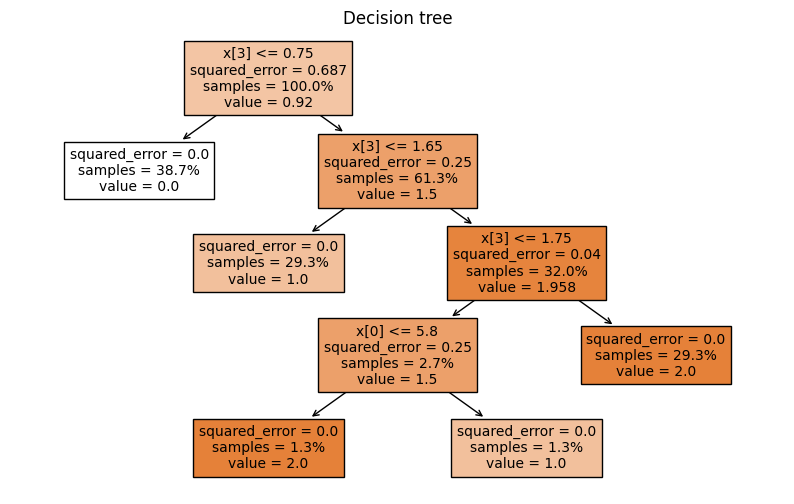

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split( features, target, random_state= 12, shuffle= True, test_size=0.5)

# Decision trees can be used for regression and classification tasks
# criterion: loss function, max depth: maximum depth of the tree
model_tree = tree.DecisionTreeRegressor( criterion='squared_error', max_depth=None, random_state= 2 )
model_tree.fit( X_train, y_train )

plt.figure( figsize=(10, 6) )

# filled: paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output
# Impurity : show the impurity at each node
tree.plot_tree(model_tree, filled=True, fontsize=10, proportion=True, impurity=True)
plt.title("Decision tree")
plt.show()

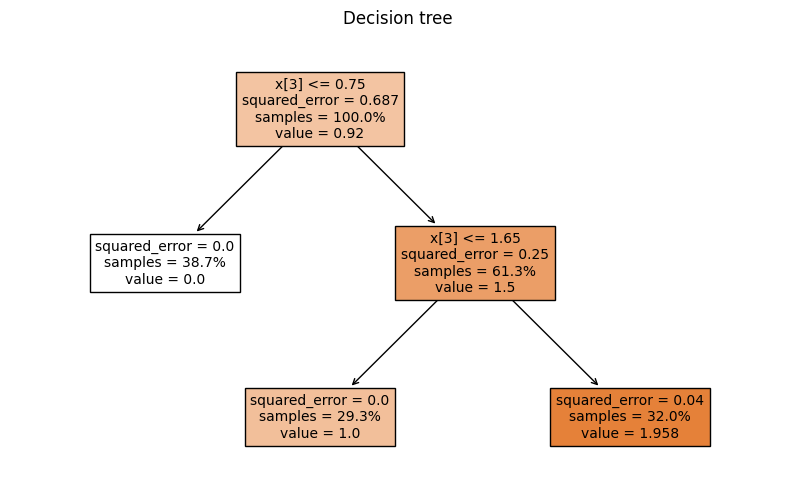

In [4]:
# Max depth parameter can help to avoid overfitting, makes model simpler and easier to interpret
model_tree_bounded = tree.DecisionTreeRegressor( criterion='squared_error', max_depth=2, random_state= 2 )
model_tree_bounded.fit( X_train, y_train )

# plotting
plt.figure( figsize=(10, 6) )
tree.plot_tree(model_tree_bounded, filled=True, fontsize=10, proportion=True, impurity=True)
plt.title("Decision tree")
plt.show()

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#metrics
def metrics( model, X_test, y_test, y_pred ):
    mae = mean_absolute_error( y_test, y_pred )
    mse = mean_squared_error( y_test, y_pred )
    score = model.score( X_test, y_test )
    print( "MSE = {:.2f}, MAE = {:.2f}, Score_R^2 = {:.2f}%".format(mae, mse, score*100))

metrics (model_tree, X_test, y_test, model_tree.predict( X_test ) )
metrics (model_tree_bounded, X_test, y_test, model_tree.predict( X_test ) )

MSE = 0.07, MAE = 0.07, Score_R^2 = 89.48%
MSE = 0.07, MAE = 0.07, Score_R^2 = 89.57%


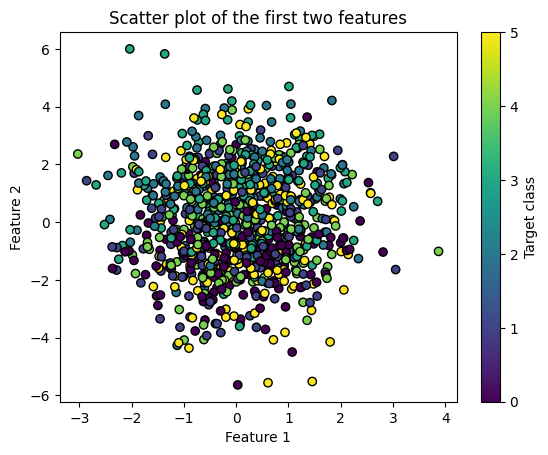

In [30]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier


features_m, target_m = make_classification(n_samples=1000, n_classes = 6, n_informative = 6, )
# features_m = np.array( features_m )

plt.scatter(features_m[:, 0], features_m[:, 1], c=target_m, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the first two features')
plt.colorbar(label='Target class')
plt.show()

In [32]:
X_test, X_train, y_test, y_train = train_test_split( features_m, target_m, random_state= 12, shuffle= True, test_size=0.5)
tree = DecisionTreeClassifier(max_depth=6).fit( X_train, y_train )
print(tree.score( X_test, y_test ))

0.458
